In [2]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import tifffile as tf

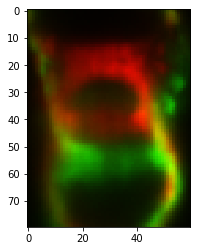

In [41]:
reference_sequence = tf.imread(r"D:\Data\2016-03-09 15.13.35 vid liebling long single plane\ref_seq.tif").astype(np.float32)
reference_sequence = reference_sequence[:, 20:80, 50:130]
motion = [reference_sequence[0], reference_sequence[8], reference_sequence[8]]

motion[0] = motion[0] / np.max(motion[0])
motion[1] = motion[1] / np.max(motion[1])
motion[2] = np.zeros_like(motion[2])

plt.imshow(np.array(motion).transpose(), interpolation = "None")
plt.show()

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9]


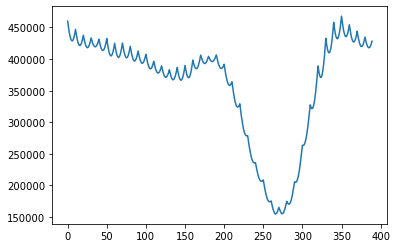

In [19]:
reference_sequence = tf.imread(r"C:\Users\kross\basic_optical_gating\data\2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif").astype(np.float32)
sequence = tf.imread(r"C:\Users\kross\basic_optical_gating\data\2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif").astype(np.float32)

interpolated_reference_sequence = []
interpolations = np.linspace(0, 0.9, 10)
print(interpolations)
for r in range(1,reference_sequence.shape[0]):
    for i in interpolations:
        interpolated_reference_sequence.append(reference_sequence[r - 1] * (1 - i) + reference_sequence[r] * (i))

interpolated_reference_sequence = np.array(interpolated_reference_sequence)
tf.imwrite("interpolated.tif", interpolated_reference_sequence)

sads = []
for i in range(interpolated_reference_sequence.shape[0]):
    sad = np.sum(np.abs(sequence[0] - interpolated_reference_sequence[i]))
    sads.append(sad)

plt.plot(sads)
plt.show()